### **Step 1: Analyzing the dataset to gain preliminary understanding**

In [25]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the file
df =pd.read_csv('Symptom2Disease.csv')

In [59]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [28]:
# Print a random sample row
df.sample()

,Unnamed: 0,label,text
21,21,Psoriasis,"For the past few weeks, I've had a skin rash o..."


In [29]:
# Print the size of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1200
Number of columns: 3


In [30]:
# Print the column names and their data types
print(df.dtypes)


Unnamed: 0     int64
label         object
text          object
dtype: object


In [31]:
# Print the number of missing values in each column
print(df.isnull().sum())

Unnamed: 0    0
label         0
text          0
dtype: int64


In [32]:
# Unique labels
print(df['label'].unique())


['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes']


In [33]:
# Print the distribution of the target variable
# This will show the count of each unique value in the 'label' column
print(df['label'].value_counts())

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64


In [60]:
# Number of duplicated rows
print(df.duplicated().sum())  


0


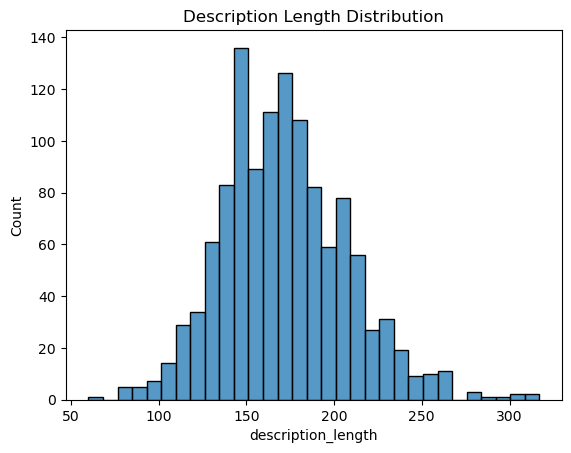

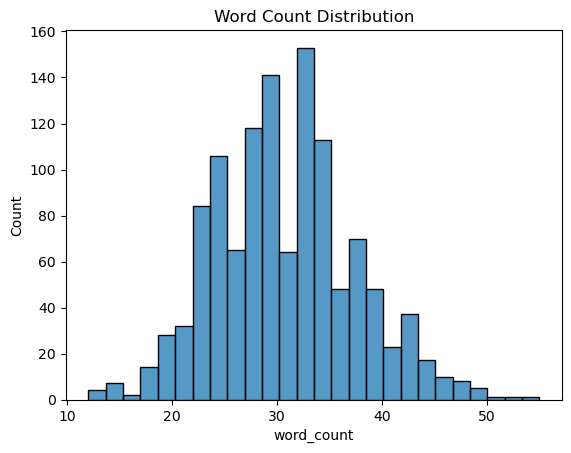

In [61]:
# Text and word count analysis
df['description_length'] = df['text'].apply(len) # Create new column description_length
df['word_count'] = df['text'].apply(lambda x: len(x.split())) # Create new column word_count

# Plotting histogram for description lengths and word counts
sns.histplot(df['description_length']).set_title('Description Length Distribution')
plt.show()

sns.histplot(df['word_count']).set_title('Word Count Distribution')
plt.show()

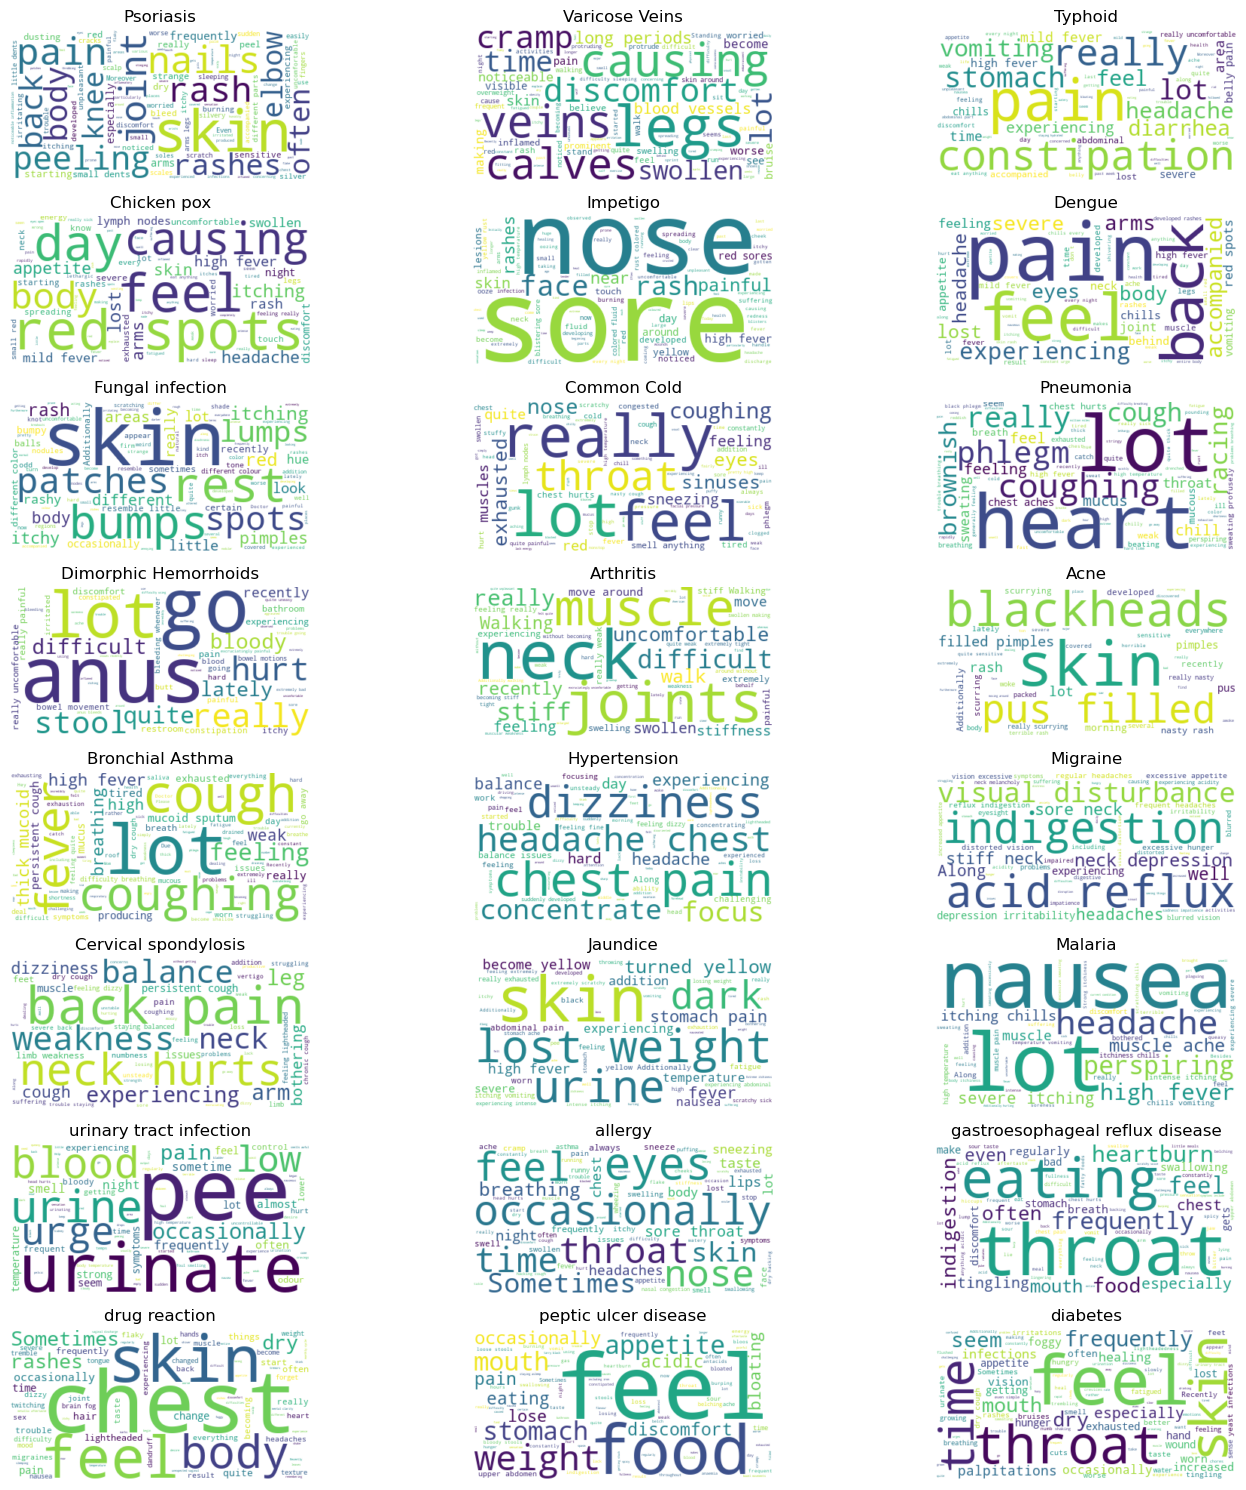

In [62]:
# Create word cloud for each disease
from wordcloud import WordCloud

# Get unique diseases
diseases = df['label'].unique()

# Define the number of rows and columns for the subplot grid.
n_cols = 3  
n_rows = int(len(diseases) / n_cols) + (len(diseases) % n_cols > 0)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15)) 
axs = axs.ravel() 

for idx, disease in enumerate(diseases):
    text = ' '.join(df[df['label'] == disease]['text'])
    wordcloud = WordCloud(background_color="white", max_words=100).generate(text)
    
    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(disease)
    axs[idx].axis('off')

for idx in range(len(diseases), n_cols*n_rows):
    axs[idx].axis('off')

plt.tight_layout()

# Save the figure with padding
plt.savefig("wordclouds_for_diseases.png", dpi=300, pad_inches=0.5)

plt.show()

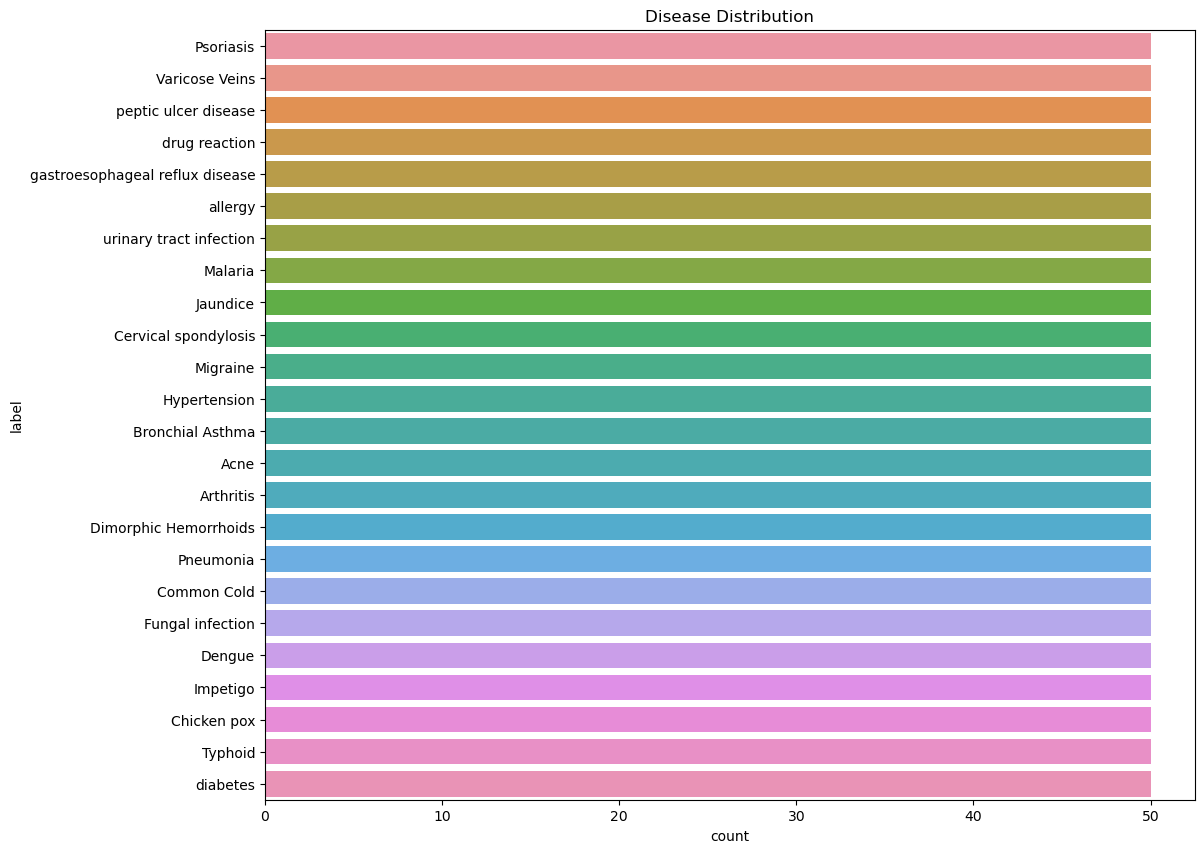

In [63]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title('Disease Distribution')
plt.show()


In [64]:
# Count of unique symptom descriptions by disease
unique_symptoms = df.groupby('label')['text'].nunique()
print(unique_symptoms)


label
Acne                               46
Arthritis                          46
Bronchial Asthma                   49
Cervical spondylosis               49
Chicken pox                        49
Common Cold                        49
Dengue                             50
Dimorphic Hemorrhoids              41
Fungal infection                   50
Hypertension                       50
Impetigo                           50
Jaundice                           38
Malaria                            44
Migraine                           47
Pneumonia                          47
Psoriasis                          50
Typhoid                            50
Varicose Veins                     50
allergy                            50
diabetes                           50
drug reaction                      50
gastroesophageal reflux disease    48
peptic ulcer disease               50
urinary tract infection            50
Name: text, dtype: int64


In [65]:
def display_duplicates_per_disease(df):
    """
    Display duplicate rows for each unique disease in the dataframe based on the 'text' column.
    
    Parameters:
    ----------
    df : pd.DataFrame
        The input dataframe has 'label' and 'text' columns.

    Returns:
    -------
    None
        The function prints the duplicates for each disease and doesn't return any value.
    """
    
    # Loop through each unique disease present in the 'label' column of the dataframe.
    for disease in df['label'].unique():
        
        # Filter the dataframe to get all rows related to the current disease.
        disease_data = df[df['label'] == disease]
        
        # Identify rows that are duplicates based on the 'text' column.
        # The 'keep=False' ensures that all duplicates are recognized. 
        # If there are 3 identical rows, all 3 will be considered as duplicates.
        duplicates = disease_data[disease_data.duplicated(subset='text', keep=False)]
    
        # If there are duplicates, print them.
        if not duplicates.empty:
            print(f"Duplicates for {disease}:")
            print(duplicates)
            print("\n")  # Add a newline for better visual separation between different diseases' duplicates.
            

In [66]:
# Call the function to display duplicates from the dataframe 'df'.
display_duplicates_per_disease(df)



Duplicates for Chicken pox:
     Unnamed: 0        label  \
151         151  Chicken pox   
163         163  Chicken pox   

                                                  text  description_length  \
151  I'm feeling fatigued and have no energy. I can...                 150   
163  I'm feeling fatigued and have no energy. I can...                 150   

     word_count  
151          27  
163          27  


Duplicates for Common Cold:
     Unnamed: 0        label  \
358          58  Common Cold   
387          87  Common Cold   

                                                  text  description_length  \
358  I've been quite exhausted and ill. My throat h...                 200   
387  I've been quite exhausted and ill. My throat h...                 200   

     word_count  
358          37  
387          37  


Duplicates for Pneumonia:
     Unnamed: 0      label                                               text  \
414         114  Pneumonia  I have a really high fever, and I

In [67]:
def remove_duplicates_from_df(df):
    """
    Remove duplicate rows based on the 'text' column for each unique disease in the dataframe, 
    while keeping one instance of each duplicated record.

    Parameters:
    ----------
    df : pd.DataFrame
        The input dataframe has 'label' and 'text' columns.

    Returns:
    -------
    df_no_duplicates : pd.DataFrame
        The dataframe with duplicates removed.
    """
    
    # Make a copy to avoid modifying the original dataframe in place.
    df_no_duplicates = df.copy()

    for disease in df['label'].unique():
        
        # Mask to get rows related to the current disease.
        disease_mask = df_no_duplicates['label'] == disease
        
        # Identify and drop duplicate rows based on the 'text' column. Only subsequent duplicates will be dropped.
        df_no_duplicates.drop(df_no_duplicates[disease_mask & df_no_duplicates.duplicated(subset='text', keep='first')].index, inplace=True)

    return df_no_duplicates


In [68]:
# Call the function and store the resulting dataframe.
df_cleaned = remove_duplicates_from_df(df)


In [69]:
df_cleaned.head()

,Unnamed: 0,label,text,description_length,word_count
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,141,28
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",138,23
2,2,Psoriasis,I have been experiencing joint pain in my fing...,148,28
3,3,Psoriasis,"There is a silver like dusting on my skin, esp...",164,32
4,4,Psoriasis,"My nails have small dents or pits in them, and...",140,27


In [70]:
df_cleaned.shape

(1153, 5)

In [71]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])


In [72]:
# Save the modified dataframe as a csv file
df_cleaned.to_csv('new_df.csv', index=False)

In [73]:
df_cleaned.shape

(1153, 4)